In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Reading multiple csv files into one DataFrame

In [2]:
df = pd.DataFrame()
for x in os.listdir(r'C:\Users\joelw\OneDrive\Documents\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'):
    info = pd.read_csv(r'C:\\Users\\joelw\\OneDrive\\Documents\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\Sales_Data\\' + x)
    frame = [df, info]
    df = pd.concat(frame)

In [4]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [6]:
df.dropna(inplace = True)

In [9]:
df.reset_index(drop = True).tail(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186304,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### Droping rows by index

In [10]:
filt = (df['Price Each'] == 'Price Each')
unwanted = df[filt].index

In [11]:
df = df.drop(unwanted).reset_index(drop = True)

### Converting string to numeric and date

In [12]:
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [13]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"


### Inserting a column at a specific location

In [14]:
sales = df['Price Each'] * df['Quantity Ordered']

sales_loc = df.columns.get_loc('Price Each') + 1

df.insert(loc = sales_loc, value = sales, column = 'Sales')

In [17]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.9,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"


In [18]:
month_loc = df.columns.get_loc('Order Date') + 1

months = df['Order Date'].dt.month

df.insert(loc = month_loc, value = months, column = 'Months')

In [21]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Months,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.9,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001"


In [22]:
df.groupby('Months')['Sales'].sum().idxmax()

12

In [23]:
T_sales = df.groupby('Months')['Sales'].sum()
month =[m for m, df in df.groupby('Months')['Sales']]

Text(0.5, 1.0, 'Monthly sales')

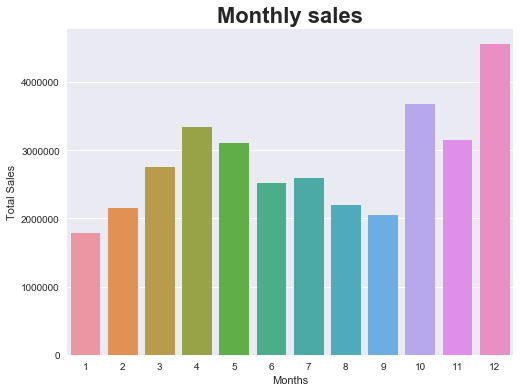

In [24]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (8, 6))
sns.set_context('notebook')
ax = sns.barplot(month, T_sales)
ax.set_xlabel('Months')
ax.set_ylabel('Total Sales')
ax.set_title('Monthly sales', fontweight = 'bold', fontsize = 22)

In [25]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Months,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215"


In [26]:
city = df['Purchase Address'].apply(lambda x: x.split(',')[1])

state = df['Purchase Address'].apply(lambda x: x.split(',')[2].split(' ')[1])

City = city + ', ' + state

city_loc = df.columns.get_loc('Purchase Address') + 1

df.insert(loc = city_loc, value = City, column = 'City')

In [31]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Months,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.9,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001","Dallas, TX"


In [32]:
df.groupby('City')['Sales'].sum().idxmax()

' San Francisco, CA'

In [33]:
df.groupby('City')['Sales'].sum().max()

8124120.94000391

### Plotting data by finding x and y variables

In [34]:
C_sales = df.groupby('City')['Sales'].sum()
cities = [ct for ct, df in df.groupby('City')['Sales']]

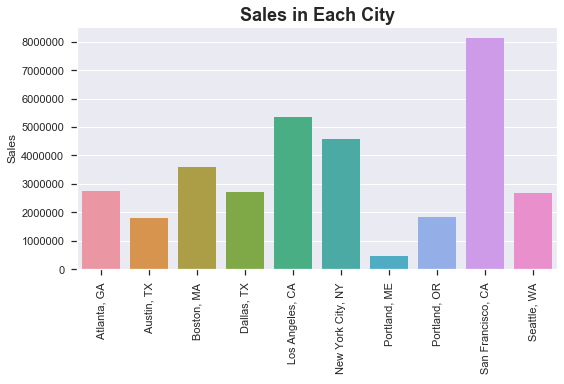

In [35]:
ax = sns.barplot(cities, C_sales)
ax.set_xticklabels(cities, rotation = 'vertical')
ax.set_title('Sales in Each City', fontweight = 'bold', fontsize = 18)
plt.tight_layout()
plt.show()

In [36]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Months,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.9,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001","Dallas, TX"


In [37]:
Hour = df['Order Date'].dt.hour

In [38]:
Hour_loc = df.columns.get_loc('Months') + 1

In [39]:
df.insert(loc = Hour_loc, value = Hour, column = 'Hour')

In [40]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Months,Hour,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.9,2019-04-19 08:46:00,4,8,"917 1st St, Dallas, TX 75001","Dallas, TX"


In [41]:
df.groupby('Hour')['Sales'].sum().idxmax()

19

In [42]:
df.groupby('Hour')['Sales'].sum().max()

2370005.5900000692

In [43]:
hour = [hr for hr, df in df.groupby('Hour')['Sales']]

In [44]:
H_sales = df.groupby('Hour')['Sales'].sum()

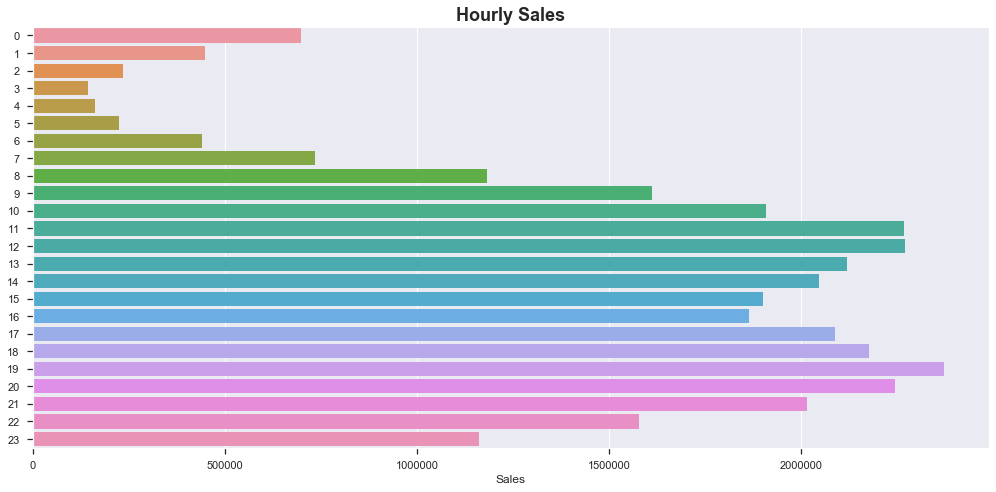

In [45]:
fig, ax = plt.subplots(figsize = (14, 7))
ax = sns.barplot(H_sales, hour, orient = 'h')
ax.set_title('Hourly Sales', fontweight = 'bold', fontsize = 18)
plt.tight_layout()
plt.show()

In [46]:
from itertools import combinations

from collections import Counter

In [47]:
df_orders = df[df['Order ID'].duplicated(keep = False)]

### Grouping products with the same ID together

In [48]:
groups = df_orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [49]:
df_orders.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Months,Hour,Purchase Address,City
2,176560,Google Phone,1,600.0,600.0,2019-04-12 14:38:00,4,14,"669 Spruce St, Los Angeles, CA 90001","Los Angeles, CA"


In [50]:
P_loc = df_orders.columns.get_loc('Product') + 1

In [51]:
df_orders.insert(loc = P_loc, value = groups, column = 'Products')

In [52]:
df_orders = df_orders[['Order ID', 'Products']]

In [53]:
df_orders = df_orders.drop_duplicates()

In [55]:
df_orders.head(1)

,Order ID,Products
2,176560,"Google Phone,Wired Headphones"


In [56]:
counts = Counter()
for row in df_orders['Products']:
    lists = row.split(',')
    counts.update(Counter(combinations(lists, 2)))

In [57]:
products = []
popularity = []
for item in counts.most_common():
    products.append(item[0])
    popularity.append(item[1])

In [58]:
Dict = {
    'Products': products,
    'Popularity' : popularity
}

In [59]:
df_sim = pd.DataFrame(Dict)

In [60]:
df_sim.head()

,Products,Popularity
0,"(iPhone, Lightning Charging Cable)",973
1,"(Google Phone, USB-C Charging Cable)",954
2,"(iPhone, Wired Headphones)",437
3,"(Google Phone, Wired Headphones)",401
4,"(Vareebadd Phone, USB-C Charging Cable)",348


In [61]:
df.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Months,Hour,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.9,2019-04-19 08:46:00,4,8,"917 1st St, Dallas, TX 75001","Dallas, TX"


In [62]:
df.groupby('Product')['Quantity Ordered'].sum().idxmax()

'AAA Batteries (4-pack)'

In [63]:
ords = df.groupby('Product')['Quantity Ordered'].sum()

In [64]:
prds = [prd for prd, df in df.groupby('Product')['Quantity Ordered']]

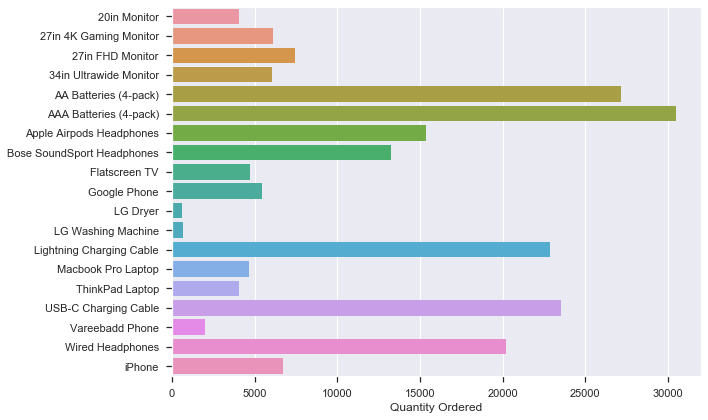

In [65]:
fig, ax = plt.subplots(figsize = (10, 6))
ax = sns.barplot(ords, prds, orient = 'h')
plt.tight_layout()
plt.show()